In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)

#---------------------------------------------------------------------------#
#User imports
import sys
sys.path.append('/Users/fardila/Documents/GitHub/HSC_vs_hydro/')
from functions import *

/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Created TAP+ (v1.0) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


      +------------------------------------------------------------+
      |             Space Telescope Tables Package                 |
      |                  TABLES Version 3.18.3                     |
      |                                                            |
      |   Space Telescope Science Institute, Baltimore, Maryland   |
      |   Copyright (C) 2014 Association of Universities for       |
      |            Research in Astronomy, Inc.(AURA)               |
      |       See stsdas$copyright.stsdas for terms of use.        |
      |         For help, send e-mail to help@stsci.edu            |
      +------------------------------------------------------------+
tables/:
 fitsio/        tbplot/         tobsolete/      ttools/


      +------------------------------------------------------------+
      |       Space Telescope Science Data Analysis System         |
  

## check ellipticity

## check 1 to 1 with other resolution

In [2]:
tng_highres_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/galaxies_stellarmaps_tng75_11.2_highres.hdf5'
tng_quick_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/galaxies_stellarmaps_tng75_11.2.hdf5'
pixel_scale_highres, pixel_scale_quick = get_pixel_scale(tng_highres_file), get_pixel_scale(tng_quick_file)
print pixel_scale_highres, pixel_scale_quick

1.0 5.333333333333333


In [3]:
tng_isos_file_highres='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/TNG_isos_highres.pkl'
tng_isos_file_quick='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/TNG_isos_quick.pkl'
tng_isos_quick = open_pkl(tng_isos_file_quick)
tng_isos_highres = open_pkl(tng_isos_file_highres)

## plot 5 random profiles in both resolutions

In [4]:
np.random.seed(0)
N=5
random_indices = np.random.choice(range(len(tng_isos_highres)),N)
print random_indices

[172  47 117 192  67]


/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


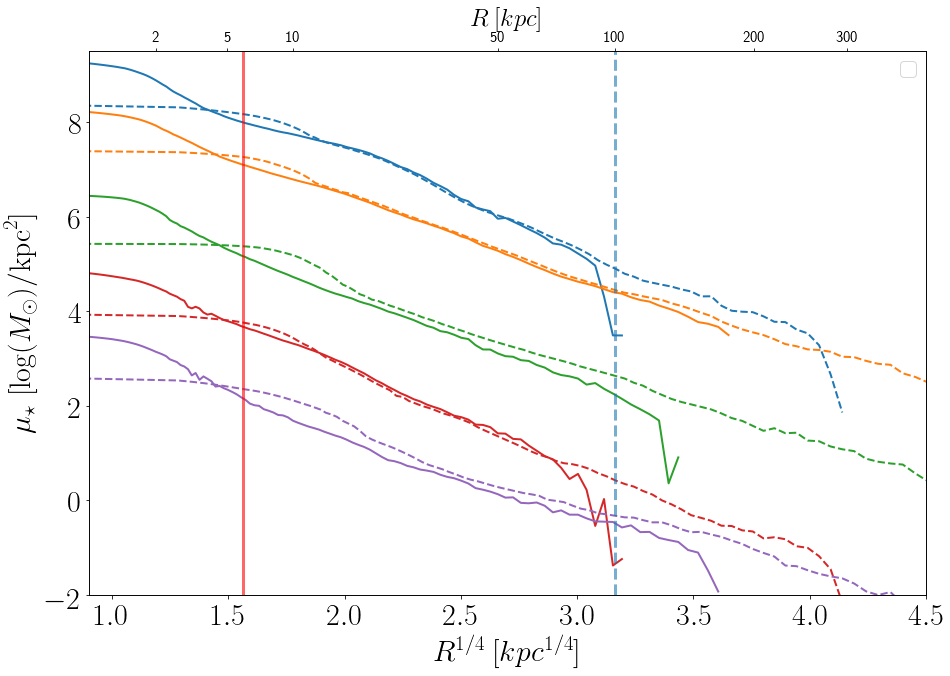

In [46]:
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot()

for i,n in zip(random_indices,range(N)):
    
    iso_highres = tng_isos_highres[i]
    iso_quick = tng_isos_quick[i]
    
    

    p = ax1.plot((iso_highres['sma'] * pixel_scale_highres) ** 0.25,
         np.log10(iso_highres['intens'] / (pixel_scale_highres**2.0))+ np.log10(0.7 ** 2.0) - (n*1.5) , linewidth=2, alpha=1, 
             label='_nolegend_', zorder=1, linestyle='-')

    ax1.plot((iso_quick['sma'] * pixel_scale_quick) ** 0.25,
         np.log10(iso_quick['intens'] / (pixel_scale_quick**2.0))+ np.log10(0.7 ** 2.0) - (n*1.5) , linewidth=2, alpha=1, 
             label='_nolegend_', zorder=2, c=p[0].get_color(), linestyle='--')




# no show lines for legend
# ax1.plot([], linewidth=2, alpha=1, label='HighRes: '+str(pixel_scale_highres)+' kpc/pixel', zorder=1, c='b') 
# ax1.plot([], linewidth=2, alpha=1, label='Quick: '+str(pixel_scale_quick)+' kpc/pixel', zorder=1, c='r') 


######################################################################################################################
# plot details
######################################################################################################################
# X-Y limits
ax1.set_xlim(0.9, 4.5)
ax1.set_ylim(-2, 9.5)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25])
ax1_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300])
ax1_twin.tick_params(axis='both', which='major', labelsize=15)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax1.axvline(800.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_Illustris.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

## zoom into middle section 

/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


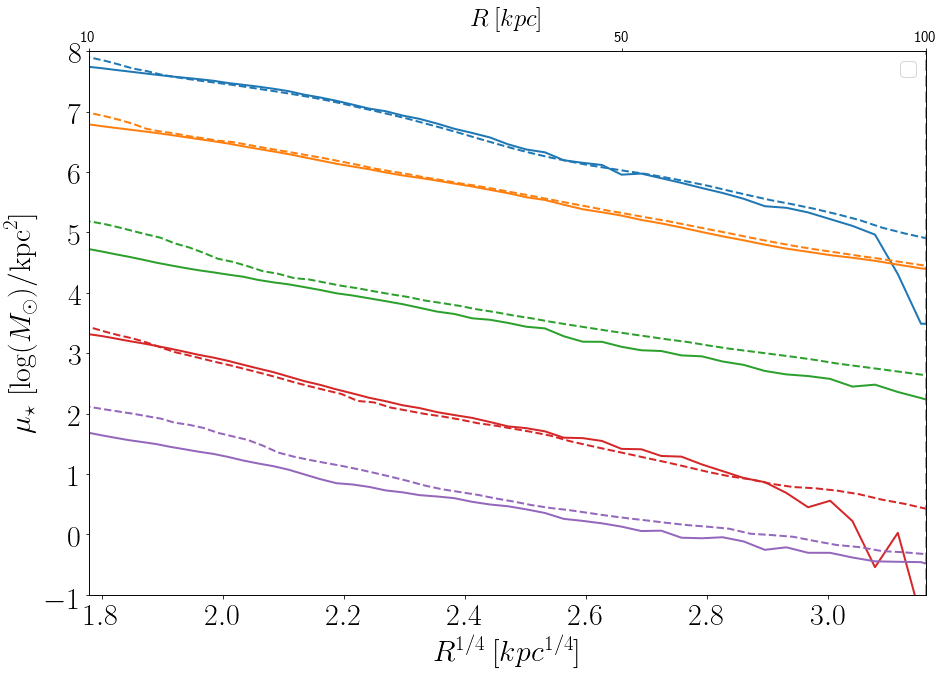

In [49]:
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot()

for i,n in zip(random_indices,range(N)):
    
    iso_highres = tng_isos_highres[i]
    iso_quick = tng_isos_quick[i]
    
    

    p = ax1.plot((iso_highres['sma'] * pixel_scale_highres) ** 0.25,
         np.log10(iso_highres['intens'] / (pixel_scale_highres**2.0))+ np.log10(0.7 ** 2.0) - (n*1.5) , linewidth=2, alpha=1, 
             label='_nolegend_', zorder=1, linestyle='-')

    ax1.plot((iso_quick['sma'] * pixel_scale_quick) ** 0.25,
         np.log10(iso_quick['intens'] / (pixel_scale_quick**2.0))+ np.log10(0.7 ** 2.0) - (n*1.5) , linewidth=2, alpha=1, 
             label='_nolegend_', zorder=2, c=p[0].get_color(), linestyle='--')





# no show lines for legend
# ax1.plot([], linewidth=2, alpha=1, label='HighRes: '+str(pixel_scale_highres)+' kpc/pixel', zorder=1, c='b') 
# ax1.plot([], linewidth=2, alpha=1, label='Quick: '+str(pixel_scale_quick)+' kpc/pixel', zorder=1, c='r') 


######################################################################################################################
# plot details
######################################################################################################################
# X-Y limits
ax1.set_xlim(10**0.25, 100**0.25)
ax1.set_ylim(-1, 8)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([10**0.25, 50**0.25, 100**0.25])
ax1_twin.xaxis.set_ticklabels([10, 50, 100])
ax1_twin.tick_params(axis='both', which='major', labelsize=15)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax1.axvline(800.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_Illustris.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

## zoom into high radius

/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


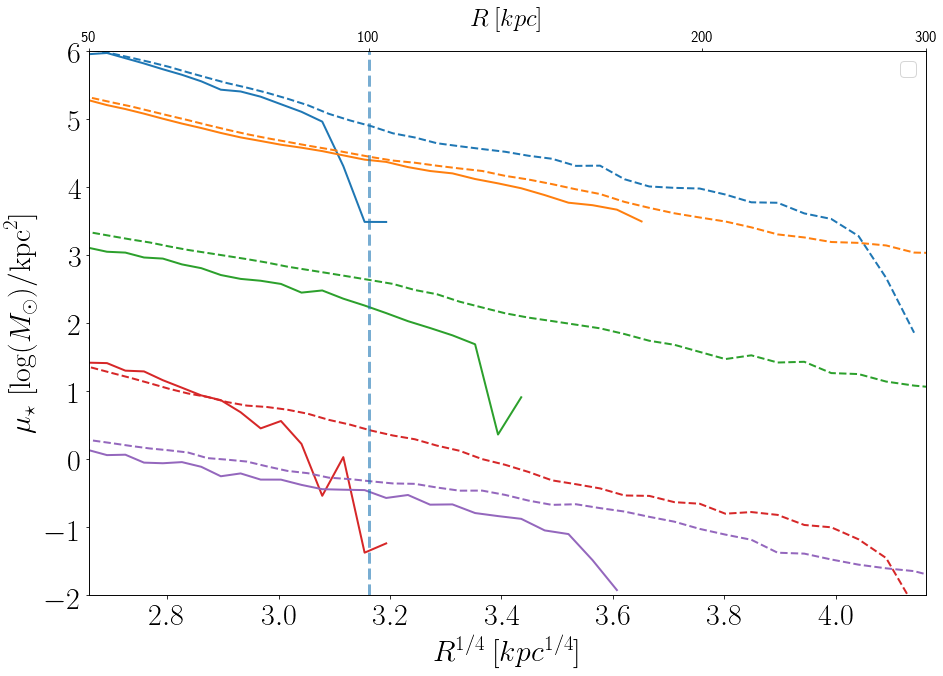

In [51]:
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot()

for i,n in zip(random_indices,range(N)):
    
    iso_highres = tng_isos_highres[i]
    iso_quick = tng_isos_quick[i]
    
    

    p = ax1.plot((iso_highres['sma'] * pixel_scale_highres) ** 0.25,
         np.log10(iso_highres['intens'] / (pixel_scale_highres**2.0))+ np.log10(0.7 ** 2.0) - (n*1.5) , linewidth=2, alpha=1, 
             label='_nolegend_', zorder=1, linestyle='-')

    ax1.plot((iso_quick['sma'] * pixel_scale_quick) ** 0.25,
         np.log10(iso_quick['intens'] / (pixel_scale_quick**2.0))+ np.log10(0.7 ** 2.0) - (n*1.5) , linewidth=2, alpha=1, 
             label='_nolegend_', zorder=2, c=p[0].get_color(), linestyle='--')




# no show lines for legend
# ax1.plot([], linewidth=2, alpha=1, label='HighRes: '+str(pixel_scale_highres)+' kpc/pixel', zorder=1, c='b') 
# ax1.plot([], linewidth=2, alpha=1, label='Quick: '+str(pixel_scale_quick)+' kpc/pixel', zorder=1, c='r') 


######################################################################################################################
# plot details
######################################################################################################################
# X-Y limits
ax1.set_xlim(50**0.25, 300**0.25)
ax1.set_ylim(-2, 6)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([50**0.25, 100**0.25, 200**0.25, 300**0.25])
ax1_twin.xaxis.set_ticklabels([50, 100, 200, 300])
ax1_twin.tick_params(axis='both', which='major', labelsize=15)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax1.axvline(800.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_Illustris.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

# images of galaxies

In [55]:
def reduce_map(map, pixel_scale, final_size_in_kpc):
    current_size_in_pixels = len(map)
    final_size_in_pixels = float(final_size_in_kpc) / pixel_scale
    
    diff = int((current_size_in_pixels - final_size_in_pixels)/2.)
    
    if diff==0:
        return map
    else:
        return map[diff:-diff,diff:-diff]

In [111]:
def galaxy_image(sim_file, sim_name, pixel_scale, ax=ax, gal_n=0):
    #central pixels
    x0=150.
    y0=150.

    # Load maps
    mass_map_cen, mass_map_cen_icl, pixel_scale, m_cat = get_mass_maps(sim_file, gal_n=gal_n)

    #postage mass
    m_post = np.log10(np.sum(mass_map_cen))
    m_post_icl = np.log10(np.sum(mass_map_cen_icl))


    #ouput maps
    maps_location='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/quick_800/'

    file_name=sim_name+'_'+str(gal_n)+'_xy'
    fits_prefix = maps_location + file_name
#     save_to_fits(mass_map_cen, fits_prefix + '_cen.fits')
    # save_to_fits(img_cen_sat, fits_prefix + '_cen_sat.fits')
    # save_to_fits(img_cen_icl, fits_prefix + '_cen_icl.fits')
    # save_to_fits(img_all, fits_prefix + '_all.fits')

    
    suffix='_cen'

    ###########################################################################
    #reduce map size to make them comparable
    data = np.ascontiguousarray(reduce_map(mass_map_cen, pixel_scale, 300))
    x0=len(data/2.)
    y0=x0
    
    #get background
    bkg = sep.Background(data, bw=10, bh=10, fw=5, fh=5)
    bkg_subtraced_data = data - bkg

    thresh = 50 * bkg.globalrms
    objects = sep.extract(bkg_subtraced_data, thresh, minarea = 100,
                          deblend_nthresh=24, deblend_cont=0.1)

    #find object closest to image center
    obj = find_closest(objects, x0=x0, y0=y0)

    #ellipse parameters
    theta = obj['theta']
    q = obj['b']/ obj['a']
    print 'ellipticity: '+ str(q)

    a_10, a_30, a_100 = (10. / pixel_scale), (30. / pixel_scale), (100. / pixel_scale)
    b_10, b_30, b_100 =  a_10 * q, a_30 * q, a_100 * q


    # plot background-subtracted image
    m, s = np.mean(data), np.std(data)
#     fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(data, interpolation='nearest', cmap=plt.get_cmap('viridis'),
                   vmin=m/5., vmax=m+s, origin='lower')

    # plot an ellipse for each object
    e_30 = Ellipse(xy=(obj['x'], obj['y']),
                 width=a_30,
                 height=b_30,
                 angle=theta * 180. / np.pi)
    e_30.set_facecolor('none')
    e_30.set_edgecolor('red')
    ax.add_artist(e_30)

    e_100 = Ellipse(xy=(obj['x'], obj['y']),
                 width=a_100,
                 height=b_100,
                 angle=theta * 180. / np.pi)
    e_100.set_facecolor('none')
    e_100.set_edgecolor('red')
    ax.add_artist(e_100)
    
#     #change limits, so both display 150kpc
#     img_size=300/pixel_scale
#     plt.xlim([x0-img_size/2., x0+img_size/2.])
#     plt.ylim([y0-img_size/2., y0+img_size/2.])
    
    #scale bar
    img_size = len(data)
    scale_bar_length = 50 #kpc
    scale_bar_y = (img_size * 0.15)
    scale_bar_x_0 = (img_size * 0.9 - (scale_bar_length / pixel_scale))
    scale_bar_x_1 = (img_size * 0.9)
    ax.plot([scale_bar_x_0, scale_bar_x_1], [scale_bar_y, scale_bar_y], linewidth=3,
            c='w', alpha=1.0)
    #text
    scale_bar_text_x = (scale_bar_x_0 + scale_bar_x_1) / 2
    scale_bar_text_y = (scale_bar_y - img_size*0.05)
    scale_bar_text = r'$%d\ \mathrm{kpc}$' % int(scale_bar_length)
    ax.text(scale_bar_text_x, scale_bar_text_y, scale_bar_text, fontsize=20, 
            horizontalalignment='center', color='w')
    
    #color bar
#     ax_cbar = inset_axes(ax1, width=color_bar_width, height=color_bar_height, loc=color_bar_loc)
#     cbar = plt.colorbar(show, ax=ax, cax=ax_cbar, orientation='horizontal')
    cbar = plt.colorbar(im, ax=ax)

#         cbar.ax.xaxis.set_tick_params(color=color_bar_color)
#         cbar.ax.yaxis.set_tick_params(color=color_bar_color)
#         cbar.outline.set_edgecolor(color_bar_color)
#         plt.setp(plt.getp(cbar.ax.axes, 'xticklabels'),
#                  color=color_bar_color, fontsize=color_bar_fontsize)
#         plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'),
#                  color=color_bar_color, fontsize=color_bar_fontsize)

#     plt.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/ellipses/quick_800/'+file_name)
#     plt.clf()


#     plt.show()


ellipticity: 0.6364325611233148
ellipticity: 0.7565235847733708


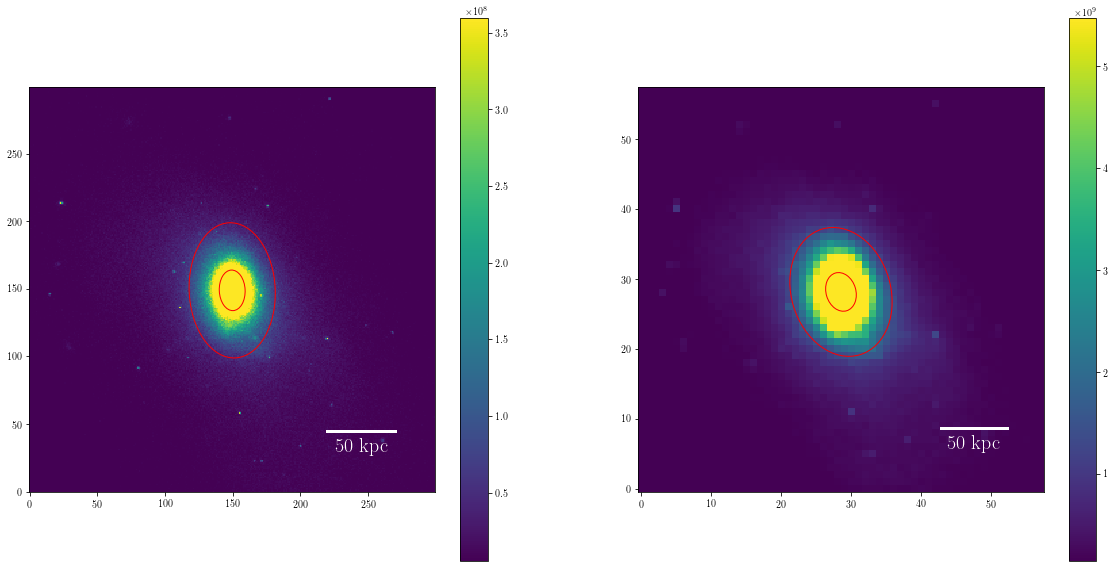

In [112]:
fig, ax = plt.subplots(1,2, figsize=(20, 10))
galaxy_image(tng_highres_file, 'TNG_highres', pixel_scale_highres, ax[0], gal_n=0)
galaxy_image(tng_quick_file, 'TNG_quick', pixel_scale_quick, ax[1], gal_n=0)

GALAXY 172
ellipticity: 0.7096989837905382
ellipticity: 0.7777205899567106
GALAXY 47
ellipticity: 0.7789578808377112
ellipticity: 0.8186910182146613
GALAXY 117
ellipticity: 0.6607481941561479
ellipticity: 0.5604459596719551
GALAXY 192
ellipticity: 0.6645956987379449
ellipticity: 0.7960757071460959
GALAXY 67
ellipticity: 0.6569473570904412
ellipticity: 0.5556155208253137


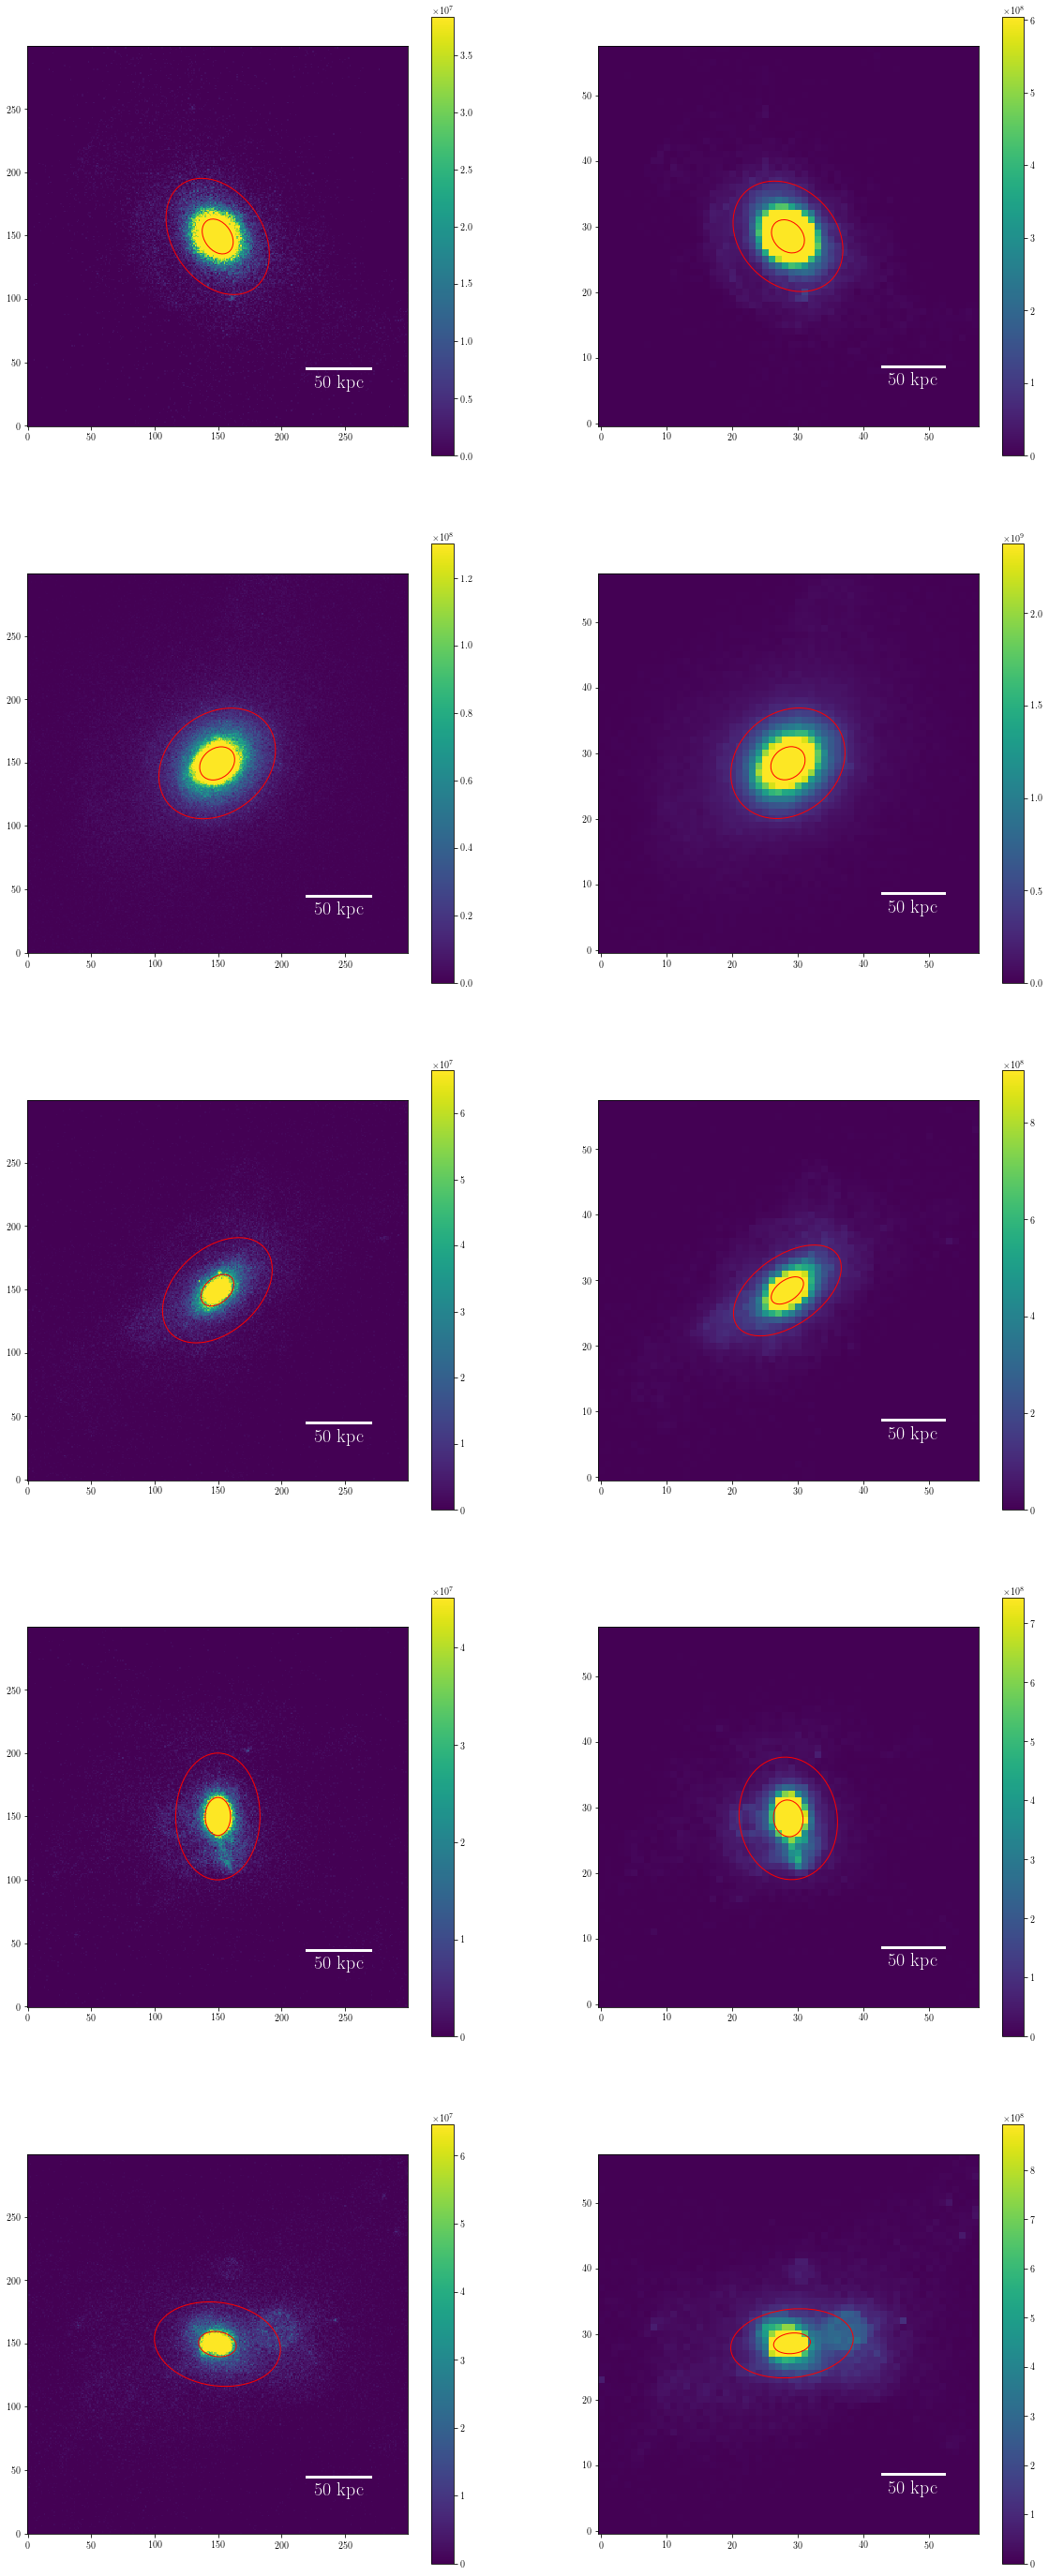

In [100]:
fig, axes = plt.subplots(figsize=(10* 2, 10* len(random_indices)), nrows=len(random_indices), ncols=2)


for ax, i in zip(axes, random_indices):
    print 'GALAXY ' + str(i)
    galaxy_image(tng_highres_file, 'TNG_highres', pixel_scale_highres, ax[0], gal_n=i)
    galaxy_image(tng_quick_file, 'TNG_quick', pixel_scale_quick, ax[1], gal_n=i)
    
plt.show()
    